In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../project-nyc-taxi-trip-duration-data/train.csv')

In [53]:
N = 10000
df_t = df.loc[0:N][['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude', 'trip_duration']]

In [54]:
from geopy.distance import vincenty
# pickup = (40.724792, -73.987793)
# dropoff = (40.656445, -73.975616)
# print(vincenty(pickup, dropoff).meters)

distance = []

for i in range(N + 1):
    a, b = df_t.loc[i]['pickup_latitude'], df_t.loc[i]['pickup_longitude']
    pickup = (a, b)
    c, d = df_t.loc[i]['dropoff_latitude'], df_t.loc[i]['dropoff_longitude']
    dropoff = (c, d)
    distance.append(vincenty(pickup, dropoff).meters)
    
df_t['distance'] = distance

In [55]:
df_t.tail(n = 10)

,pickup_longitude,dropoff_longitude,pickup_latitude,dropoff_latitude,trip_duration,distance
9991,-74.014015,-74.004211,40.712921,40.724174,499,1499.273003
9992,-73.978233,-73.982300,40.786537,40.775597,430,1262.505067
9993,-73.980095,-73.988709,40.755234,40.742626,252,1577.766329
9994,-73.990959,-74.000473,40.734158,40.721153,628,1652.708015
9995,-73.955521,-73.948700,40.779411,40.794746,544,1797.636466
9996,-73.969963,-73.961121,40.758110,40.769051,218,1426.013229
9997,-73.989738,-73.995949,40.741364,40.720238,953,2403.937616
9998,-73.978394,-73.983017,40.752197,40.771778,1163,2209.205050
9999,-73.965485,-73.958946,40.805832,40.814640,205,1122.997899
10000,-73.974815,-73.961067,40.756527,40.772186,536,2090.805380


In [56]:
# 이상치 제거
df_t = df_t[df_t['trip_duration'] < 10000]

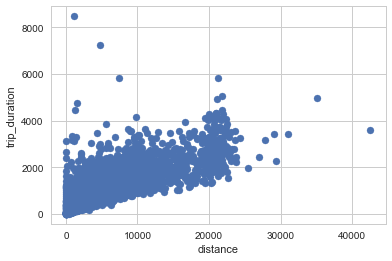

In [57]:
plt.xlabel('distance')
plt.ylabel('trip_duration')
# plt.xlim(0, 26000)
# plt.ylim(0, 5000)
plt.scatter(df_t['distance'], df_t['trip_duration'])

In [58]:
df_t.corr()

,pickup_longitude,dropoff_longitude,pickup_latitude,dropoff_latitude,trip_duration,distance
pickup_longitude,1.000000,0.346429,-0.157267,0.042281,0.329209,0.501153
dropoff_longitude,0.346429,1.000000,0.044393,0.136556,0.226898,0.358138
pickup_latitude,-0.157267,0.044393,1.000000,0.433432,-0.239425,-0.295456
dropoff_latitude,0.042281,0.136556,0.433432,1.000000,-0.153236,-0.091127
trip_duration,0.329209,0.226898,-0.239425,-0.153236,1.000000,0.774256
distance,0.501153,0.358138,-0.295456,-0.091127,0.774256,1.000000


In [59]:
df_t.describe()

,pickup_longitude,dropoff_longitude,pickup_latitude,dropoff_latitude,trip_duration,distance
count,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000
mean,-73.974831,-73.974233,40.748901,40.750449,831.911084,3386.160455
std,0.037717,0.035965,0.028098,0.032858,619.327812,3797.805548
min,-74.181648,-74.302773,40.628738,40.577278,1.000000,0.000000
25%,-73.992695,-73.991798,40.733297,40.732529,407.000000,1275.947209
50%,-73.982689,-73.981346,40.751102,40.751549,668.000000,2158.215806
75%,-73.968769,-73.963917,40.766983,40.768995,1083.000000,3826.284032
max,-73.548119,-73.516922,40.874706,41.029736,8481.000000,42550.690403
